In [ ]:
#This progrmas will classifise images

In [ ]:
#Import the libarise
import tensorflow as tf
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
plt.style.use ('fivethirtyeight')


In [ ]:
#load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
#look at the data types of the variable 
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#Get the shape of the arrays 
print('x_train shape:' , x_train.shape)
print('y_train shape:' , y_train.shape)
print('x_test shape:' , x_test.shape)
print('y_test shape:' , y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


In [ ]:
 #take a look at the first image as an array
 index = 9
 x_train[index]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

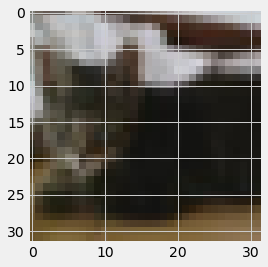

In [ ]:
#show the image as a picture
image = plt.imshow(x_train[index])

In [ ]:
#Get the image label
print('the image label is :',y_train[index])

the image label is : [3]


In [ ]:
#Get the image classification
classification = ['airplain', 'autombil', 'bird', 'cat', 'deer', 'dog','frog','horse', 'ship','truck']
#print the image class
print('The image class is :', classification[y_train[index][0]])

The image class is : cat


In [ ]:
#convert the label into a set of 10 numbers to input into the neural network
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
#print the new label
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [ ]:
#print the new lable for the current image/picture
print('The one hot lable is :', y_train_one_hot[index])

The one hot lable is : [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


In [ ]:
#Normalize the pixels to be values between 0 and 1
y_train = y_train/255
x_test = x_test /255

In [ ]:
x_train[index]

array([[[125, 125, 116],
        [110, 101,  91],
        [102,  90,  83],
        ...,
        [202, 207, 214],
        [200, 205, 212],
        [202, 208, 214]],

       [[142, 146, 142],
        [146, 144, 139],
        [176, 172, 170],
        ...,
        [195, 201, 205],
        [198, 205, 209],
        [204, 211, 215]],

       [[180, 185, 183],
        [143, 146, 146],
        [156, 157, 157],
        ...,
        [122, 111, 113],
        [139, 128, 131],
        [158, 147, 150]],

       ...,

       [[104,  82,  41],
        [101,  80,  39],
        [101,  81,  38],
        ...,
        [126, 103,  67],
        [126, 103,  69],
        [125, 101,  68]],

       [[104,  81,  40],
        [105,  84,  41],
        [109,  88,  43],
        ...,
        [138, 113,  78],
        [137, 113,  80],
        [137, 112,  81]],

       [[105,  83,  42],
        [108,  87,  45],
        [115,  94,  50],
        ...,
        [143, 117,  82],
        [143, 116,  84],
        [144, 116,  86]]

In [ ]:
#criate the model arcitiarchitecture 
model = Sequential() 
#add the first layer
model.add(Conv2D(32 ,(5,5), activation = 'relu', input_shape = (32, 32, 3)))

#add a pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add another convolution layer
model.add(Conv2D(32 ,(5,5), activation = 'relu'))

#add another pooling layer
model.add(MaxPooling2D(pool_size = (2,2)))

#add a flattaning layer
model.add(Flatten())

#add a layer with 1000 neurons
model.add(Dense(1000, activation ='relu')) 

#add a dropout layer
model.add(Dropout(0.5))
#add a layer with 500 neurons
model.add(Dense(500, activation='relu')) 

#add a dropout layer
model.add(Dropout(0.5))

#add a layer with 250 neurons
model.add(Dense(250, activation='relu'))

#add a layer with 10 neurons
model.add(Dense(10, activation='softmax'))


In [ ]:
ord('a')

97

In [ ]:
#compile the model
model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])

In [ ]:
#train the model
hist = model.fit(x_train, y_train_one_hot,
                 batch_size = 256,
                 epochs = 10,
                 validation_split = 0.2)

Epoch 1/12
157/157 [==============================] - 54s 346ms/step - loss: 2.9778 - accuracy: 0.1018 - val_loss: 2.3028 - val_accuracy: 0.0977
Epoch 2/12
157/157 [==============================] - 54s 342ms/step - loss: 2.3027 - accuracy: 0.1028 - val_loss: 2.3027 - val_accuracy: 0.0976
Epoch 3/12
157/157 [==============================] - 54s 342ms/step - loss: 2.3025 - accuracy: 0.1002 - val_loss: 2.3026 - val_accuracy: 0.0958
Epoch 4/12
157/157 [==============================] - 54s 342ms/step - loss: 2.3019 - accuracy: 0.1018 - val_loss: 2.3013 - val_accuracy: 0.0962
Epoch 5/12
157/157 [==============================] - 54s 343ms/step - loss: 2.2992 - accuracy: 0.1042 - val_loss: 2.2994 - val_accuracy: 0.1069
Epoch 6/12
157/157 [==============================] - 54s 342ms/step - loss: 2.2171 - accuracy: 0.1600 - val_loss: 1.9980 - val_accuracy: 0.2330
Epoch 7/12
157/157 [==============================] - 54s 341ms/step - loss: 1.9867 - accuracy: 0.2439 - val_loss: 1.9619 - val_ac

In [ ]:
#Evalevate the model using the test data set
model.evaluate(x_test, y_test_one_hot)[1]

313/313 [==============================] - 5s 15ms/step - loss: 2.4332 - accuracy: 0.1000


0.10000000149011612

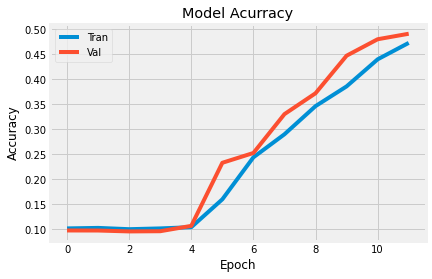

In [ ]:
#visulize the model accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Acurracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Tran','Val'] , loc = 'upper left') 
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Unrecognized location 'upper righy'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  import sys


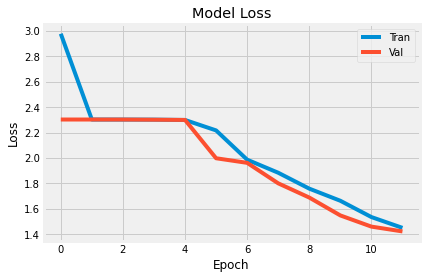

In [ ]:
 #visualize the modle loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Tran','Val'] , loc = 'upper righy') 
plt.show()

In [ ]:
#test the model with an example
from google.colab import files
uploaded = files.upload()

Saving deer.123.jpg to deer.123 (1).jpg


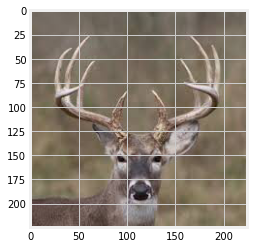

In [ ]:
#show the image
new_image = plt.imread('deer.123 (1).jpg')
img = plt.imshow(new_image)

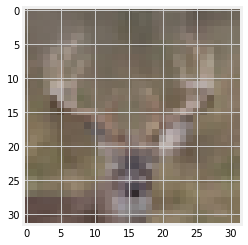

In [ ]:
#Resize the image
from skimage.transform import resize
resize_image = resize(new_image, (32,32,3))
img = plt.imshow(resize_image)


In [ ]:
#Get the models predictions
predictions = model.predict(np.array([resize_image]))
#show the predictions
predictions

array([[0.1566535 , 0.07160988, 0.10842816, 0.05902724, 0.1142469 ,
        0.03740063, 0.11918634, 0.02969079, 0.22339454, 0.08036198]],
      dtype=float32)

In [ ]:
#sort the predictions from least to the greagreatest 
list_index=[0,1,2,3,4,5,6,7,8,9]
x = predictions
for i in range(10):
  for j in range(10):
    if x[0][list_index[i]] > x[0][list_index[j]]:
      temp = list_index[i]
      list_index[i] = list_index[j]
      list_index[j] = temp

#show the sorted label in order
print(list_index)



[8, 0, 6, 4, 2, 9, 1, 3, 5, 7]


In [ ]:
#print the first 5 predictions
for i in range(5):
  print(classification[list_index[i]], ':' ,round(predictions[0][list_index[i]] * 100, 2), '%' )

ship : 22.34 %
airplain : 15.67 %
frog : 11.92 %
deer : 11.42 %
bird : 10.84 %


In [ ]:
str1 = "this is pytopython"
str1[-1:]
import math
abs(math.sqrt(36))
def

6.0

In [ ]:
def func(x):
  x = x=[5] + ["hello"]
  return x
  list_1 ={1,2,3,4}
  func(list_1)
  print(len(list_1))

In [ ]:
def func(x):
  x = x=[5] + ["hello"]
  return x
  list_1 ={1,2,3,4}
  func(list_1)
  print(len(list_1))